# AMLSim Dataset

#### Important Links:
- https://github.com/IBM/AMLSim
- https://github.com/IBM/AMLSim/wiki

"The AMLSim project is intended to provide a multi-agent based simulator that generates synthetic banking transaction data together with a set of known money laundering patterns - mainly for the purpose of testing machine learning models and graph algorithms. We welcome you to enhance this effort"

In [34]:
#IMPORTS:

import matplotlib.pyplot as plt
import matplotlib as mpl
import urllib.request
import pandas as pd
import urllib
import tarfile
import os
import networkx as nx
import numpy as np
np.random.seed(42)
import sklearn
import seaborn as sns # importing seaborn for the heatmap
import sys
assert sys.version_info >= (3, 5) # Python ≥3.5 is required

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, ComplementNB, CategoricalNB, GaussianNB
from sklearn.cluster import KMeans 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn import svm
from pyod.models.cblof import CBLOF
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from pyod.models.knn import KNN
from imblearn.over_sampling import SMOTE
import itertools
from glob import glob 
import matplotlib.image as mpimg
from skimage.io import imread 
import tensorflow as tf
assert tf.__version__ >= "2.0"
from skimage import io
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn import preprocessing 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from keras import Input # for instantiating a keras tensor
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, average_precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, Activation)
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from numpy import where
from matplotlib import pyplot


"accounts": "accounts.csv" - Account list CSV  
"transactions": "transactions.csv" - All transaction list CSV  
"cash_transactions": "cash_tx.csv" - Cash transaction list CSV  
"alert_members": "alert_accounts.csv" - Alerted member account list CSV  
"alert_transactions": "alert_transactions.csv" - Alerted transaction list CSV  
"sar_accounts": "sar_accounts.csv" - SAR-flagged member account list CSV  
"transaction_log": "tx_log.csv"  
"counter_log": "tx_count.csv"  
"diameter_log": "diameter.csv"  

In [2]:
accounts = pd.read_csv("C:/Users/HP/Desktop/amlsim_dataset/accounts.csv")
account_mapping = pd.read_csv("C:/Users/HP/Desktop/amlsim_dataset/accountMapping.csv")
alert_accounts = pd.read_csv("C:/Users/HP/Desktop/amlsim_dataset/alert_accounts.csv")
transactions = pd.read_csv("C:/Users/HP/Desktop/amlsim_dataset/transactions.csv")
alert_transactions = pd.read_csv("C:/Users/HP/Desktop/amlsim_dataset/alert_transactions.csv")
cash_tx = pd.read_csv("C:/Users/HP/Desktop/amlsim_dataset/cash_tx.csv")
sar_accounts = pd.read_csv("C:/Users/HP/Desktop/amlsim_dataset/sar_accounts.csv")

In [3]:
accounts.head()

,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,...,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,0,C_0,I,A,USD,False,1,0,1000000,96646.86,...,48764 Howard Forge Apt. 421,Vanessaside,PA,US,19763,Male,2022-11-20,701-43-7736,120.547683,-62.968225
1,1,C_1,I,A,USD,False,1,0,1000000,80707.36,...,387 Grimes Green Apt. 801,Pagetown,NM,US,44165,Male,1915-09-16,196-73-3633,-51.894050,-51.749453
2,2,C_2,I,A,USD,False,1,0,1000000,52101.10,...,15871 Arnold Squares Apt. 858,Port Carrie,LA,US,58826,Female,1950-04-15,590-31-4757,-81.286230,-39.160654
3,3,C_3,I,A,USD,False,1,0,1000000,90324.40,...,471 Erika Curve,North Megan,UT,US,71358,Female,1978-07-13,283-67-3859,-64.464688,68.323549
4,4,C_4,I,A,USD,False,1,0,1000000,91267.86,...,477 Miller Ridge Apt. 795,East Allen,DE,US,92950,Male,1952-05-24,437-08-1649,-101.424385,-31.273420


In [4]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_id           1446 non-null   int64  
 1   dsply_nm          1446 non-null   object 
 2   type              1446 non-null   object 
 3   acct_stat         1446 non-null   object 
 4   acct_rptng_crncy  1446 non-null   object 
 5   prior_sar_count   1446 non-null   bool   
 6   branch_id         1446 non-null   int64  
 7   open_dt           1446 non-null   int64  
 8   close_dt          1446 non-null   int64  
 9   initial_deposit   1446 non-null   float64
 10  tx_behavior_id    0 non-null      float64
 11  bank_id           1446 non-null   object 
 12  first_name        1446 non-null   object 
 13  last_name         1446 non-null   object 
 14  street_addr       1446 non-null   object 
 15  city              1446 non-null   object 
 16  state             1446 non-null   object 


In [5]:
#Check if the data has an NaN values
transactions.isnull().any()

tran_id           False
orig_acct         False
bene_acct         False
tx_type           False
base_amt          False
tran_timestamp    False
is_sar            False
alert_id          False
dtype: bool

In [6]:
transactions.head()

,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id
0,1,982,23,TRANSFER,501.95,2017-01-01T00:00:00Z,False,-1
1,2,1107,104,TRANSFER,248.90,2017-01-01T00:00:00Z,False,-1
2,3,659,107,TRANSFER,552.61,2017-01-01T00:00:00Z,False,-1
3,4,620,10,TRANSFER,945.10,2017-01-01T00:00:00Z,False,-1
4,5,504,103,TRANSFER,604.33,2017-01-01T00:00:00Z,False,-1


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121457 entries, 0 to 121456
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tran_id         121457 non-null  int64  
 1   orig_acct       121457 non-null  int64  
 2   bene_acct       121457 non-null  int64  
 3   tx_type         121457 non-null  object 
 4   base_amt        121457 non-null  float64
 5   tran_timestamp  121457 non-null  object 
 6   is_sar          121457 non-null  bool   
 7   alert_id        121457 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 6.6+ MB


## Exploratory Data Analysis (EDA)

In [8]:
#Check if the data has an NaN values
transactions.isnull().any()

tran_id           False
orig_acct         False
bene_acct         False
tx_type           False
base_amt          False
tran_timestamp    False
is_sar            False
alert_id          False
dtype: bool

In [9]:
transactions['is_sar'].value_counts()

False    121392
True         65
Name: is_sar, dtype: int64

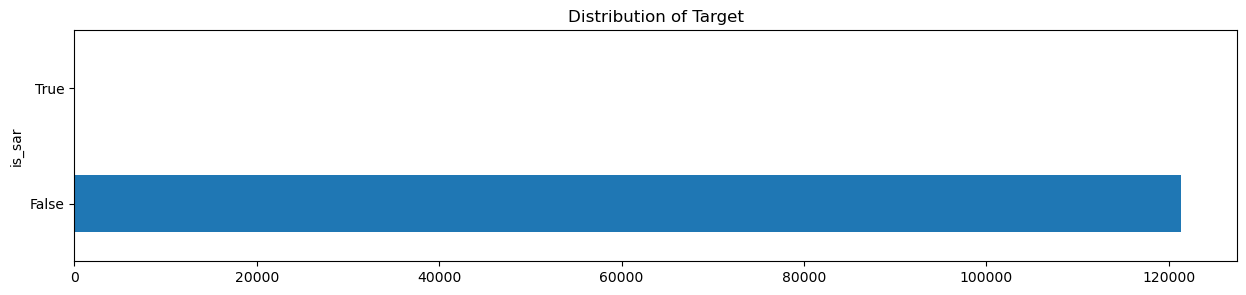

In [10]:
transactions.groupby('is_sar') \
    .count()['tran_id'] \
    .plot(kind='barh',
          title='Distribution of Target',
          figsize=(15, 3))
plt.show()

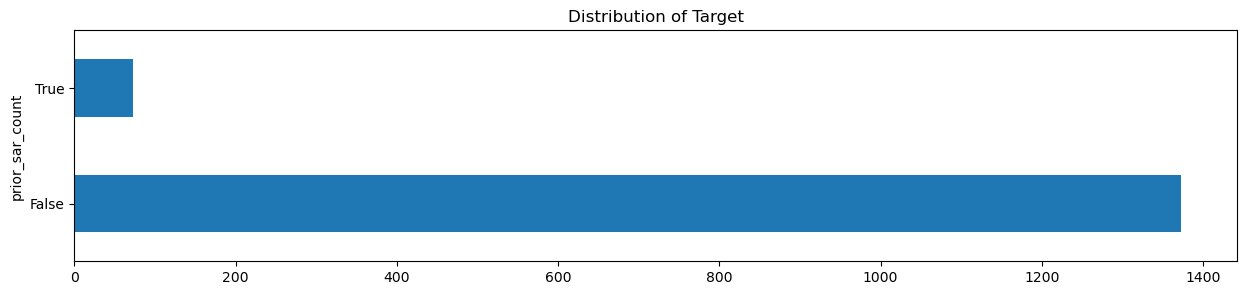

In [11]:
accounts.groupby('prior_sar_count') \
    .count()['acct_id'] \
    .plot(kind='barh',
          title='Distribution of Target',
          figsize=(15, 3))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

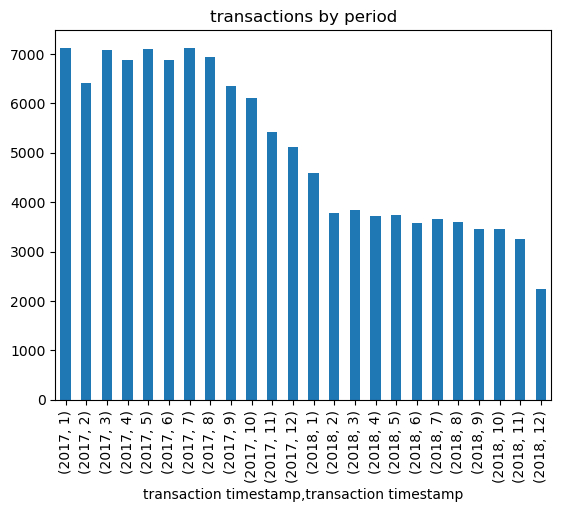

In [12]:
#check over which period
transactions['transaction timestamp'] = pd.to_datetime(transactions['tran_timestamp'], format='%Y-%m-%d')
transactions.groupby([transactions["transaction timestamp"].dt.year, transactions["transaction timestamp"].dt.month])['tran_id'].count().plot(kind="bar")
plt.title('transactions by period')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

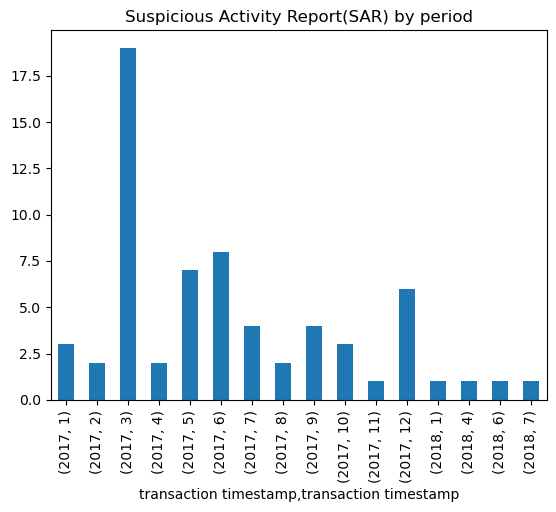

In [13]:
transactions.loc[transactions['is_sar']==True].groupby([transactions["transaction timestamp"].dt.year, transactions["transaction timestamp"].dt.month])['tran_id'].count().plot(kind="bar")
plt.title('Suspicious Activity Report(SAR) by period')
plt.show

In [14]:
#Checking the transaction amount per SAR
amt_per_sar= transactions.groupby('is_sar')['base_amt'].agg([max, min])

print('Mean transaction amt for fraud is {:.4f}'.format(transactions.loc[transactions['is_sar'] == True]['base_amt'].mean()))
print('Mean transaction amt for non-fraud is {:.4f}'.format(transactions.loc[transactions['is_sar'] == False]['base_amt'].mean()))

amt_per_sar

Mean transaction amt for fraud is 495.5134
Mean transaction amt for non-fraud is 540.9621


,max,min
is_sar,,
False,999.99,0.25
True,997.92,108.68


In [15]:
transactions.head()

,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,transaction timestamp
0,1,982,23,TRANSFER,501.95,2017-01-01T00:00:00Z,False,-1,2017-01-01 00:00:00+00:00
1,2,1107,104,TRANSFER,248.90,2017-01-01T00:00:00Z,False,-1,2017-01-01 00:00:00+00:00
2,3,659,107,TRANSFER,552.61,2017-01-01T00:00:00Z,False,-1,2017-01-01 00:00:00+00:00
3,4,620,10,TRANSFER,945.10,2017-01-01T00:00:00Z,False,-1,2017-01-01 00:00:00+00:00
4,5,504,103,TRANSFER,604.33,2017-01-01T00:00:00Z,False,-1,2017-01-01 00:00:00+00:00


## Model Training and Testing


In [54]:
vc = transactions['is_sar'].value_counts().to_frame().reset_index()
vc['percent'] = vc["is_sar"].apply(lambda x : round(100*float(x) / len(transactions), 2))
vc = vc.rename(columns = {"index" : "Target", "is_sar" : "Count"})
vc

,Target,Count,percent
0,False,121392,99.95
1,True,65,0.05


In [16]:
# replacing values
tran_model = transactions.copy()
tran_model['tx_type'].replace(['TRANSFER'],
                        [0], inplace=True)
tran_model['transaction timestamp'] = pd.to_datetime(tran_model['transaction timestamp'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')
tran_model.head()

,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,transaction timestamp
0,1,982,23,0,501.95,2017-01-01T00:00:00Z,False,-1,2017-01-01 00:00:00+00:00
1,2,1107,104,0,248.90,2017-01-01T00:00:00Z,False,-1,2017-01-01 00:00:00+00:00
2,3,659,107,0,552.61,2017-01-01T00:00:00Z,False,-1,2017-01-01 00:00:00+00:00
3,4,620,10,0,945.10,2017-01-01T00:00:00Z,False,-1,2017-01-01 00:00:00+00:00
4,5,504,103,0,604.33,2017-01-01T00:00:00Z,False,-1,2017-01-01 00:00:00+00:00


In [17]:
tran_model = tran_model.drop(columns=['transaction timestamp', 'tran_timestamp'])
tran_model.head()

,tran_id,orig_acct,bene_acct,tx_type,base_amt,is_sar,alert_id
0,1,982,23,0,501.95,False,-1
1,2,1107,104,0,248.90,False,-1
2,3,659,107,0,552.61,False,-1
3,4,620,10,0,945.10,False,-1
4,5,504,103,0,604.33,False,-1


In [18]:
X = tran_model.drop(['is_sar'], axis = 1).values
y = tran_model["is_sar"].values

print(X.shape)
print(y.shape)

(121457, 6)
(121457,)


In [19]:
non_AML = tran_model[tran_model['is_sar'] == False].sample(1000)
aml = tran_model[tran_model['is_sar'] == True]

df = non_AML.append(aml).sample(frac=1).reset_index(drop=True)
X_df = df.drop(['is_sar'], axis = 1)
y_df = df["is_sar"]

print(X_df.shape)
print(y_df.shape)

(1065, 6)
(1065,)


C:\Users\HP\AppData\Local\Temp\ipykernel_10940\2741975374.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = non_AML.append(aml).sample(frac=1).reset_index(drop=True)


### TSNE

In [20]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1065 samples in 0.006s...
[t-SNE] Computed neighbors for 1065 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1065
[t-SNE] Computed conditional probabilities for sample 1065 / 1065
[t-SNE] Mean sigma: 1219.953976


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.898037
[t-SNE] KL divergence after 5000 iterations: 0.210977


In [74]:
tsne_df = pd.DataFrame(columns=['tsne1','tsne2', 'is_sar'], data = np.column_stack((tsne_scale_results, y_df)))

In [76]:
# cast targets column to int
tsne_df.loc[:, 'is_sar'] = tsne_df.is_sar.astype(int)
tsne_df.head()

,tsne1,tsne2,is_sar
0,-42.068905,0.460884,0
1,26.040722,9.386440,0
2,-13.695353,15.945040,0
3,2.754065,-25.765835,0
4,-47.779739,-13.166607,0


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


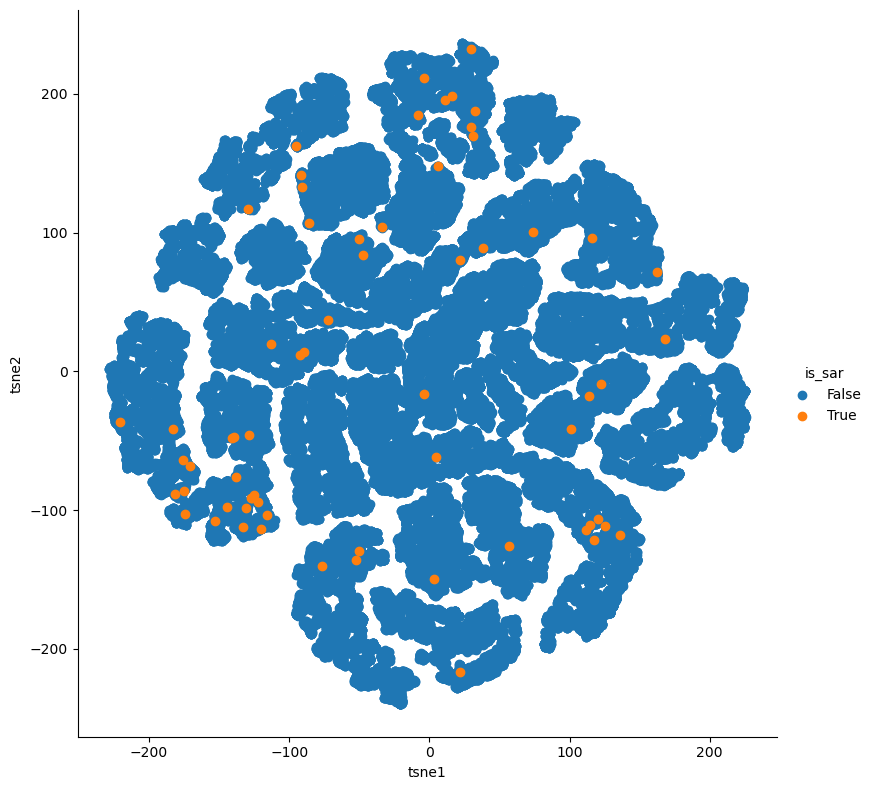

In [27]:
sar_map = {0:'False',
            1: 'True'}
tsne_df.loc[:, 'is_sar'] = tsne_df.is_sar.map(sar_map)

grid = sns.FacetGrid(tsne_df, hue="is_sar", size=8)
grid.map(plt.scatter, 'tsne1', 'tsne2').add_legend()

#### Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, shuffle=False)

In [21]:
#train and test dataframe on the different models

classes = np.array(['0','1'])
# CODE COPIED: https://towardsdatascience.com/unsupervised-learning-for-anomaly-detection-44c55a96b8c1
def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')


def train_test_models(model, X_train, Y_train, X_test, Y_test):

        accuracies = []

        #train model on data
        model.fit(X_train, Y_train)

        #find accuracy score
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        print("Accuracy of %s is %s" % (model, acc))

        accuracies.append(acc)

        precision = precision_score(Y_test, y_pred, average='macro')
        print(f"Precision Score of the classifier %s is %s" %
              (model, precision))

        recall = recall_score(Y_test, y_pred, average='macro')
        print(f"Recall Score of the classifier %s is %s" %
              (model, recall))

        fscore = f1_score(Y_test, y_pred, average='macro')
        print(f"F1 Score of the classifier %s is %s" %
              (model, fscore))


        #find confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        plot_confusion_matrix(cm,["Licit", "Illicit"])


        print('\n\n')

        return accuracies  # a list of every models accuracy on the current dataset

### Supervised Learning

#### Random Forest

Accuracy of RandomForestClassifier() is 1.0
Precision Score of the classifier RandomForestClassifier() is 1.0
Recall Score of the classifier RandomForestClassifier() is 1.0
F1 Score of the classifier RandomForestClassifier() is 1.0





[1.0]

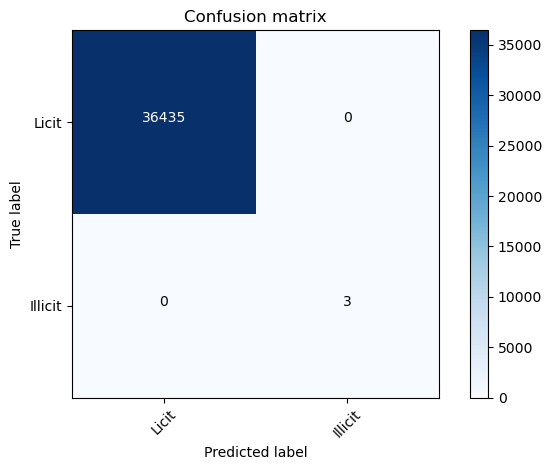

In [22]:
model_rf = RandomForestClassifier()
train_test_models(model_rf, X_train, y_train, X_test, y_test)

Accuracy of LogisticRegression(max_iter=3000) is 1.0
Precision Score of the classifier LogisticRegression(max_iter=3000) is 1.0
Recall Score of the classifier LogisticRegression(max_iter=3000) is 1.0
F1 Score of the classifier LogisticRegression(max_iter=3000) is 1.0





[1.0]

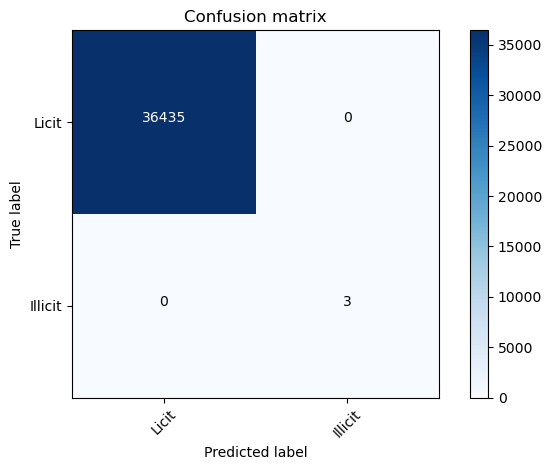

In [57]:
model_lr = LogisticRegression(solver='lbfgs', max_iter=3000)
train_test_models(model_lr, X_train, y_train, X_test, y_test)

Accuracy of SVC(kernel='linear') is 0.9999176683681871
Precision Score of the classifier SVC(kernel='linear') is 0.49995883418409354
Recall Score of the classifier SVC(kernel='linear') is 0.5
F1 Score of the classifier SVC(kernel='linear') is 0.4999794162446997





C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9999176683681871]

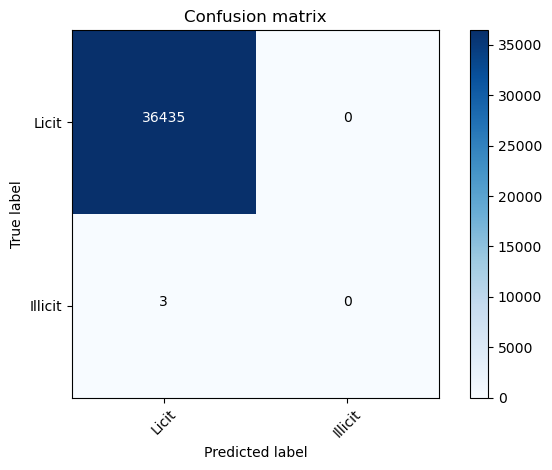

In [27]:
model_svm = svm.SVC(kernel='linear') # Linear Kernel
train_test_models(model_svm, X_train, y_train, X_test, y_test)

### SMOTE

In [22]:
y_train_smote = y_train
X_train_smote = X_train

In [23]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [24]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_smote, y_train_smote = pipeline.fit_resample(X_train_smote, y_train_smote)

#### SVM with SMOTE

Accuracy of SVC(kernel='linear') is 0.999945112245458
Precision Score of the classifier SVC(kernel='linear') is 0.999972555369542
Recall Score of the classifier SVC(kernel='linear') is 0.6666666666666666
F1 Score of the classifier SVC(kernel='linear') is 0.7499862773081567





[0.999945112245458]

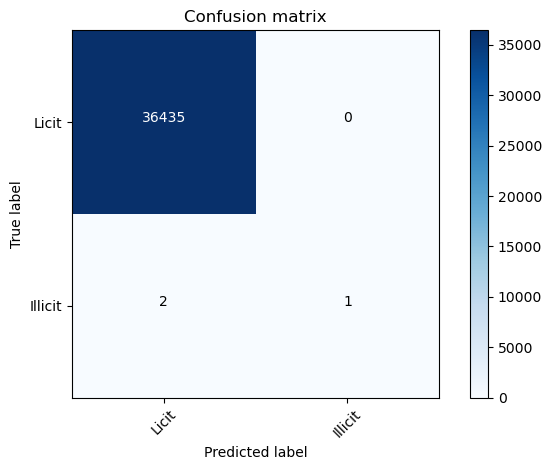

In [26]:
train_test_models(model_svm, X_train_smote, y_train_smote, X_test, y_test)

### Unsupervised Learning

#### Local Outlier Factor

Accuracy of LocalOutlierFactor(contamination=0.05) is 8.233163181294254e-05
Precision Score of the classifier LocalOutlierFactor(contamination=0.05) is 2.888837531777213e-05
Recall Score of the classifier LocalOutlierFactor(contamination=0.05) is 0.3333333333333333
F1 Score of the classifier LocalOutlierFactor(contamination=0.05) is 5.7771743840087825e-05


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[8.233163181294254e-05]

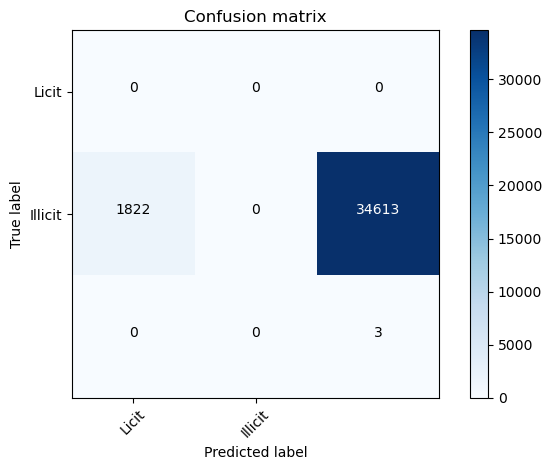

In [42]:
model_lof = LocalOutlierFactor(contamination=0.05)
train_test_models(model_lof, X_train, y_train, X_test, y_test)

#### K-Nearest Neighbours

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\pyod\models\base.py:431: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Accuracy of KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0) is 0.005653438717822054
Precision Score of the classifier KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0) is 0.5000413964399062
Recall Score of the classifier KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0) is 0.5027857829010567
F1 Score of the classifier KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0) is 0.005623481478527419





[0.005653438717822054]

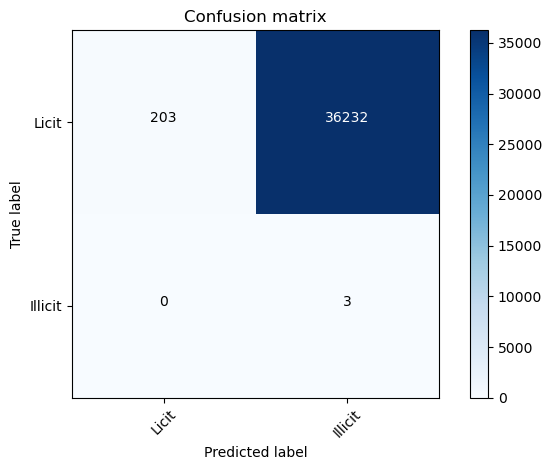

In [37]:
model_knn = KNN(contamination=0.05) 
train_test_models(model_knn, X_train, y_train, X_test, y_test)

#### Cluster-Based Local Outlier Factor
Not suitable for clustering due to imbalanced dataset (only 0.34 % cases are AML transactions) very large transactions skewing the distribution

### Deep Learning Models

#### RNN

In [28]:
# scale the data
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# reshape the data
X_train_smote = X_train_smote.reshape(X_train_smote.shape[0], X_train_smote.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
# Define the RNN model
model1 = Sequential()
model1.add(LSTM(units=64, input_shape=(X_train_smote.shape[1], 1), return_sequences=True))
model1.add(LSTM(units=32, return_sequences=False))
model1.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 

# Train the RNN model
history = model1.fit(X_train_smote, y_train_smote, epochs=3, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the RNN model
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/3
797/797 [==============================] - 16s 16ms/step - loss: 0.1027 - accuracy: 0.9518 - val_loss: 3.1164e-04 - val_accuracy: 1.0000
Epoch 2/3
797/797 [==============================] - 12s 15ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 1.3010e-04 - val_accuracy: 1.0000
Epoch 3/3
797/797 [==============================] - 12s 16ms/step - loss: 3.3764e-04 - accuracy: 1.0000 - val_loss: 5.1080e-05 - val_accuracy: 1.0000
Test loss: 5.108011100674048e-05
Test accuracy: 1.0


In [30]:
# Predict on test data
y_pred = model1.predict(X_test).round()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print F1 score
print('F1 score:', f1)

1139/1139 [==============================] - 6s 4ms/step
F1 score: 1.0


### Semi-supervised Learning

#### Autoencoders

In [47]:
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded_layer = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded_layer = Dense(50, activation='relu')(encoded)

## decoding part
decoded_layer = Dense(50, activation='tanh')(encoded_layer)
decoded_layer = Dense(100, activation='tanh')(encoded_layer)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded_layer)

In [32]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

In [35]:
x = tran_model.drop(["is_sar"], axis=1)
y = tran_model["is_sar"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

In [51]:
x_norm.shape

(121392, 6)

In [52]:
x_fraud.shape

(65, 6)

In [38]:
autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 20, 
                shuffle = True, validation_split = 0.20);

Epoch 1/20
7/7 [==============================] - 1s 38ms/step - loss: 0.1204 - val_loss: 0.1254
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1201 - val_loss: 0.1251
Epoch 3/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1198 - val_loss: 0.1248
Epoch 4/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1196 - val_loss: 0.1246
Epoch 5/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1193 - val_loss: 0.1243
Epoch 6/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1190 - val_loss: 0.1240
Epoch 7/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1188 - val_loss: 0.1237
Epoch 8/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1185 - val_loss: 0.1235
Epoch 9/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1182 - val_loss: 0.1232
Epoch 10/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1180 - val_loss: 0.1229
Epoch 11/20
7/7 [=====================

In [39]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])


norm_hid_rep = hidden_representation.predict(x_norm[:3000])
fraud_hid_rep = hidden_representation.predict(x_fraud)

3/3 [==============================] - 0s 2ms/step


In [40]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(rep_x)

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3065 samples in 0.001s...
[t-SNE] Computed neighbors for 3065 samples in 0.250s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3065
[t-SNE] Computed conditional probabilities for sample 2000 / 3065
[t-SNE] Computed conditional probabilities for sample 3000 / 3065
[t-SNE] Computed conditional probabilities for sample 3065 / 3065
[t-SNE] Mean sigma: 0.030036
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.407494
[t-SNE] KL divergence after 5000 iterations: 0.604912


In [41]:
tsne_df_1 = pd.DataFrame(columns=['tsne1','tsne2', 'is_sar'], data = np.column_stack((tsne_scale_results, rep_y)))

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


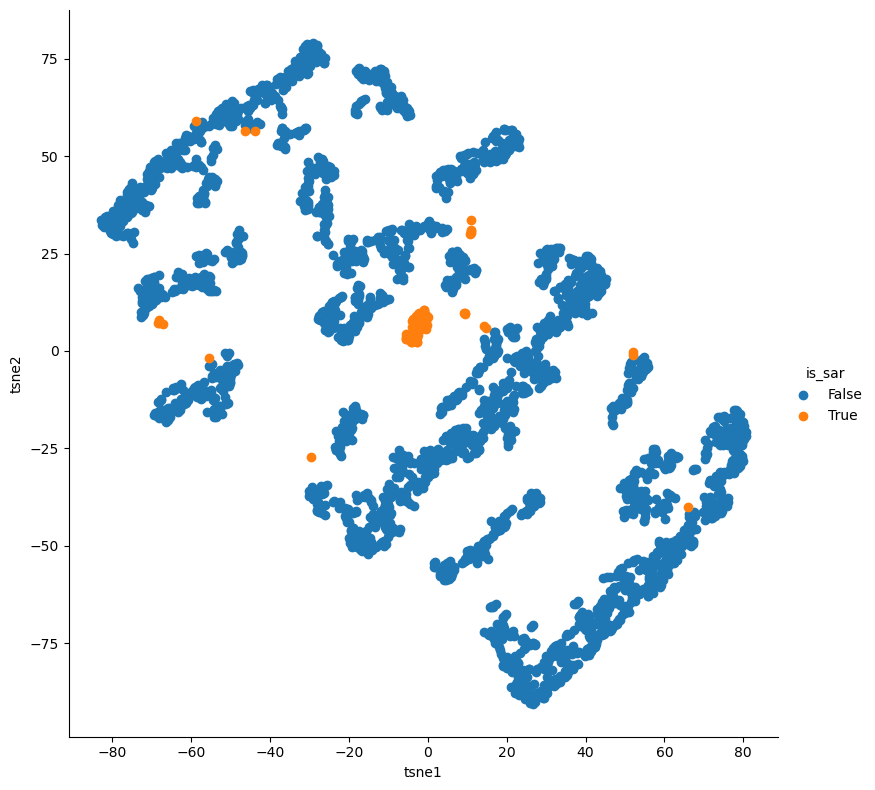

In [42]:
sar_map = {0:'False',
            1: 'True'}
# map targets to actual clothes for plotting
tsne_df_1.loc[:, 'is_sar'] = tsne_df_1.is_sar.map(sar_map)
grid = sns.FacetGrid(tsne_df_1, hue="is_sar", size=8)
grid.map(plt.scatter, 'tsne1', 'tsne2').add_legend()

In [44]:
from sklearn.metrics import classification_report

train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))

print ("")
print("Confusion matrix: ", confusion_matrix(val_y,pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       757
         1.0       1.00      0.10      0.18        10

    accuracy                           0.99       767
   macro avg       0.99      0.55      0.59       767
weighted avg       0.99      0.99      0.98       767


Accuracy Score:  0.9882659713168188

Confusion matrix:  [[757   0]
 [  9   1]]


### This shows that the F1 score depends heavily on how imbalanced our training dataset is. 

Accuracy of LogisticRegression(max_iter=3000) is 0.9882659713168188
Precision Score of the classifier LogisticRegression(max_iter=3000) is 0.9941253263707572
Recall Score of the classifier LogisticRegression(max_iter=3000) is 0.55
F1 Score of the classifier LogisticRegression(max_iter=3000) is 0.5879543962275413





[0.9882659713168188]

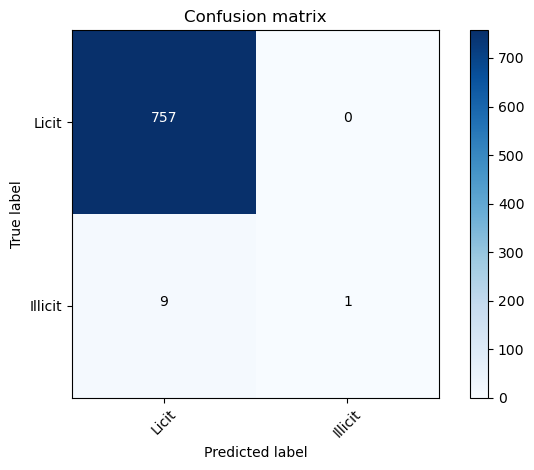

In [46]:
model_lr = LogisticRegression(solver='lbfgs', max_iter=3000)

train_test_models(model_lr, train_x, train_y, val_x, val_y)

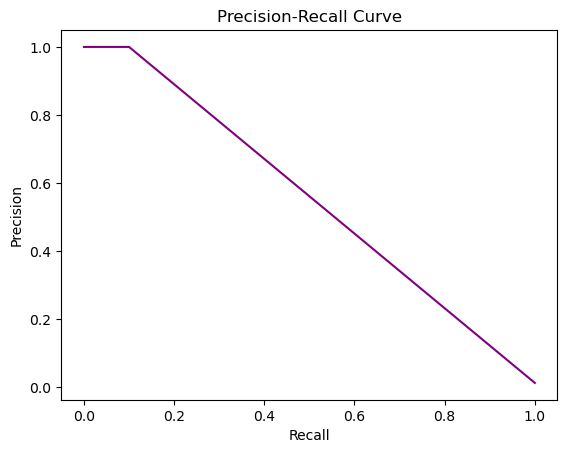

In [49]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(val_y,pred_y)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

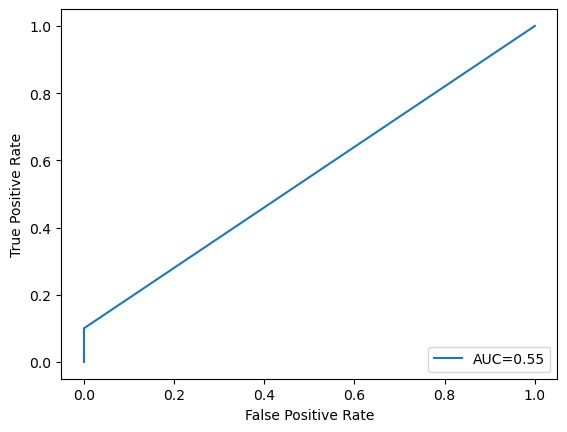

In [50]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(val_y,pred_y)
auc = metrics.roc_auc_score(val_y,pred_y)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

MCC takes into account all four values in the confusion matrix, and a high value (close to 1) means that both classes are predicted well, even if one class is disproportionately under- (or over-) represented.

In [55]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(val_y,pred_y)

0.3143645420115816